# How Random Forests Work

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload csv file 'census_cleaned' as df_census
df_census = pd.read_csv('census_cleaned.csv')

# Split data into X and y
X_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]

In [3]:
# Initialize the classifier
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

# Obtain scores of cross-validation
scores = cross_val_score(rf, X_census, y_census, cv=5)

# Display accuracy
print('Accuracy:', np.round(scores, 3))

# Display mean accuracy
print('Accuracy mean: %0.3f' % (scores.mean()))

Accuracy: [0.851 0.844 0.851 0.852 0.851]
Accuracy mean: 0.850


In [4]:
# Upload csv file 'bike_rentals_cleaned' as df_bikes
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

# Show first 5 rows
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [5]:
# Split data into X and y
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

In [6]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, random_state=2, n_jobs=-1)

# Obtain scores of cross-validation using num_splits and mean squared error
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

# Take square root of the scores
rmse = np.sqrt(-scores)

# Display accuracy
print('RMSE:', np.round(rmse, 3))

# Display mean score
print('RMSE mean: %0.3f' % (rmse.mean()))

RMSE: [ 801.486  579.987  551.347  846.698  895.05  1097.522  893.738  809.284
  833.488 2145.046]
RMSE mean: 945.365


# Random Forest Hyperparameters

In [7]:
# Intialize Random Forest Classifier with oob_score=True
rf = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rf.fit(X_census, y_census)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=2, verbose=0,
                       warm_start=False)

In [8]:
# Display oob score
rf.oob_score_

0.8343109855348423

In [9]:
# Intialize Random Forest Classifier with n_estimators=50 and oob_score=True
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rf.fit(X_census, y_census)

# Display oob_score
rf.oob_score_

0.8518780135745216

In [10]:
# Intialize Random Forest Classifier with n_estimators=100 and oob_score=True
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rf.fit(X_census, y_census)

# Display oob_score
rf.oob_score_

0.8551334418476091

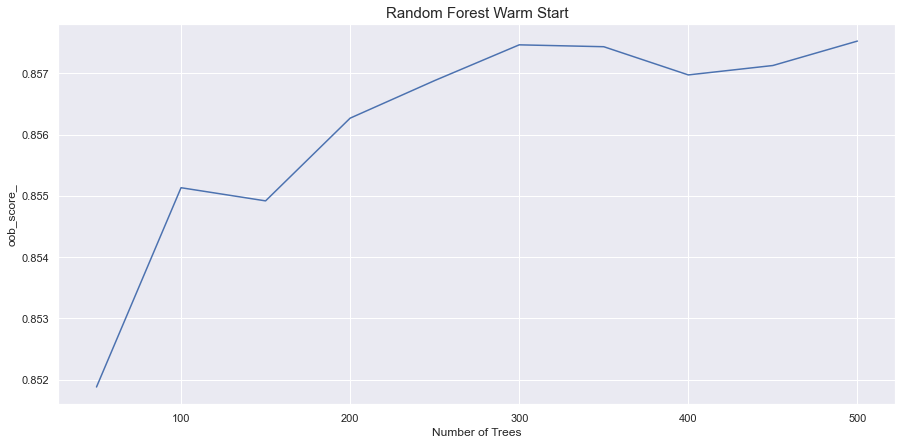

In [11]:
# Import matplotlib
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# Set seborn to dark grid
sns.set()

# Intialize empty list of oob_scores
oob_scores = []

# Initalize Random Forest as rf with 50 estimators, warm_start=True, and oob_score=True
rf = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=2)

# Fit rf to Census dataset
rf.fit(X_census, y_census)

# Append rf_oob_score to oob_scores list
oob_scores.append(rf.oob_score_)

# Initalize est to 50
est = 50

# Initalize estimtators list with est
estimators=[est]

# Use for loop from 0 -9 
for i in range(9):
    
    # Add 50 to est
    est += 50
    
    # Append est to estimators list
    estimators.append(est)

    # Set n_estimators to est
    rf.set_params(n_estimators=est)
    
    # Fit rf on Census dataset
    rf.fit(X_census, y_census)
    
    # Append rf_oob_score to oob_scores list
    oob_scores.append(rf.oob_score_)

# Set size of display
plt.figure(figsize=(15,7))

# Plot estimators and oob_scores
plt.plot(estimators, oob_scores)

# Set x label
plt.xlabel('Number of Trees')

# Set y label
plt.ylabel('oob_score_')

# Display title
plt.title('Random Forest Warm Start', fontsize=15)

# Save graph
plt.savefig('Random_Forest_Warm_Start', dpi=325)

# Show graph
plt.show()

# Random Forest Case Study

In [12]:
# Upload csv file 'bike_rentals_cleaned' as df_bikes
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

# Show first 5 rows
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [14]:
# Initalize Random Forest as rf with 50 estimators, warm_start=True, and oob_score=True
rf = RandomForestRegressor(n_estimators=50, warm_start=True, n_jobs=-1, random_state=2)
   
# Obtain scores of cross-validation using num_splits and mean squared error
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)
    
# Take square root of the scores
rmse = np.sqrt(-scores)
    
# Display accuracy
print('RMSE:', np.round(rmse, 3))

# Display mean score
print('RMSE mean: %0.3f' % (rmse.mean()))

RMSE: [ 836.482  541.898  533.086  812.782  894.877  881.117  794.103  828.968
  772.517 2128.148]
RMSE mean: 902.398


In [15]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_reg(params, runs=16, reg=RandomForestRegressor(random_state=2, n_jobs=-1)):

    # Instantiate RandomizedSearchCV as grid_reg
    rand_reg = RandomizedSearchCV(reg, params, n_iter=runs, scoring='neg_mean_squared_error', 
                                  cv=10, n_jobs=-1, random_state=2)
    
    # Fit grid_reg on X_train and y_train
    rand_reg.fit(X_train, y_train)

    # Extract best estimator
    best_model = rand_reg.best_estimator_

    # Extract best params
    best_params = rand_reg.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = np.sqrt(-rand_reg.best_score_)

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)
    
    # Import mean_squared_error from sklearn.metrics as MSE 
    from sklearn.metrics import mean_squared_error as MSE

    # Compute rmse_test
    rmse_test = MSE(y_test, y_pred)**0.5

    # Print rmse_test
    print('Test set score: {:.3f}'.format(rmse_test))

In [16]:
randomized_search_reg(params={'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
                          'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
                          'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20]
                         })

Best params: {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.03, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 25, 'max_features': 0.7, 'max_depth': None}
Training score: 759.076
Test set score: 701.802


In [17]:
randomized_search_reg(params={
                          'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20],
                         })

Best params: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 10}
Training score: 679.052
Test set score: 626.541


In [18]:
randomized_search_reg(params={
                          'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,4,6,8,10,12,15,20]
                         }, runs=20)

Best params: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
Training score: 675.128
Test set score: 619.014


In [19]:
randomized_search_reg(params={
                          'min_samples_leaf':[1,2,3,4,5,6],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.08, 0.10, 0.12, 0.15],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,8,10,12,14,16,18,20]
                         })

Best params: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.05, 'max_features': 0.7, 'max_depth': 18}
Training score: 679.595
Test set score: 630.954


In [20]:
randomized_search_reg(params={
                          'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,4,6,8,10,12,15,20],
                        'n_estimators':[100]
                         }, runs=20)

Best params: {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
Training score: 675.128
Test set score: 619.014


In [21]:
randomized_search_reg(params={
                          'min_samples_leaf':[1,2,3],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10],
                          'max_features':[0.6],
                          'max_depth':[10,12,14,16,18,20],
                        'n_estimators':[100]
                         }, runs=20)

Best params: {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_features': 0.6, 'max_depth': 20}
Training score: 673.982
Test set score: 623.106


In [22]:
# Initalize Random Forest as rf with 100 estimators, warm_start=True, and oob_score=True
rf = RandomForestRegressor(n_estimators=100,  min_impurity_decrease=0.1, max_features=0.6, max_depth=12, n_jobs=-1, random_state=2)
   
# Obtain scores of cross-validation using num_splits and mean squared error
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)
    
# Take square root of the scores
rmse = np.sqrt(-scores)
    
# Display accuracy
print('RMSE:', np.round(rmse, 3))

# Display mean score
print('RMSE mean: %0.3f' % (rmse.mean()))

RMSE: [ 818.354  514.173  547.392  814.059  769.54   730.025  831.376  794.634
  756.83  1595.237]
RMSE mean: 817.162


In [23]:
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [24]:
from sklearn.utils import shuffle
df_shuffle_bikes = shuffle(df_bikes, random_state=2)
df_shuffle_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
671,672,4.0,1.0,11.0,0.0,5.0,1.0,1,0.355000,0.356042,0.522083,0.266175,5847
199,200,3.0,0.0,7.0,0.0,2.0,1.0,1,0.776667,0.747479,0.650417,0.130600,4541
77,78,1.0,0.0,3.0,0.0,6.0,0.0,1,0.472500,0.466525,0.379167,0.368167,3117
225,226,3.0,0.0,8.0,0.0,0.0,0.0,2,0.676667,0.624388,0.817500,0.222633,3820
37,38,1.0,0.0,2.0,0.0,1.0,1.0,1,0.271667,0.303658,0.738333,0.045408,1712


In [25]:
# Split data into X and y
X_shuffle_bikes = df_shuffle_bikes.iloc[:,:-1]
y_shuffle_bikes = df_shuffle_bikes.iloc[:,-1]

In [26]:
# Initalize Random Forest as rf with 100 estimators, warm_start=True, and oob_score=True
rf = RandomForestRegressor(n_estimators=100,  min_impurity_decrease=0.1, max_features=0.6, max_depth=12, n_jobs=-1, random_state=2)
   
# Obtain scores of cross-validation using num_splits and mean squared error
scores = cross_val_score(rf, X_shuffle_bikes, y_shuffle_bikes, scoring='neg_mean_squared_error', cv=10)
    
# Take square root of the scores
rmse = np.sqrt(-scores)
    
# Display accuracy
print('RMSE:', np.round(rmse, 3))

# Display mean score
print('RMSE mean: %0.3f' % (rmse.mean()))

RMSE: [630.093 686.673 468.159 526.676 593.033 724.575 774.402 672.63  760.253
 616.797]
RMSE mean: 645.329
